In [1]:
# import necessary libraries
from scipy.stats import sem, t
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
# for ploting just after the code
%matplotlib inline 

In [2]:
# read the loan data
df = pd.read_csv("Dataset.csv")
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [3]:
# take a glance at the loan dataframe
df.head(n=5)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
# checking for na values in the loan dataframe
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# slicing the loanAmount column
LoanAmount = df['LoanAmount']

In [6]:
# check for na values and sum
LoanAmount.isna().sum()

22

In [7]:
# filling na in the loanAmount column with the average
LoanAmount = LoanAmount.fillna( LoanAmount.mean())

In [8]:
# check for na and sum
LoanAmount.isna().sum()

0

### Loan Amount distribution

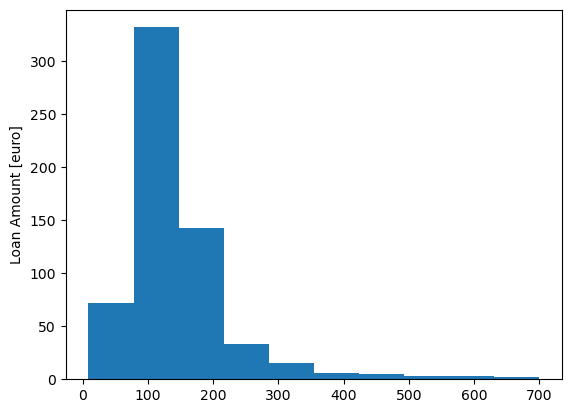

In [9]:
# distribution of the loanAmount using histogram
plt.hist(LoanAmount )
plt.ylabel("Loan Amount [euro]");

C:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


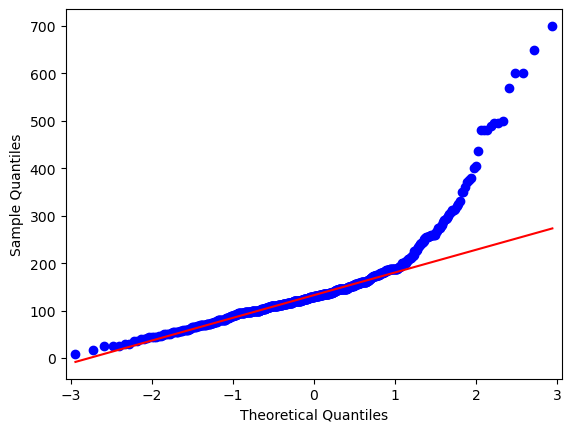

In [10]:
# distribution of the loanAmount using qqplot
qqplot(LoanAmount, line='q');

In [11]:
# check for missing values in the Applicant Income column
df['ApplicantIncome'].isna().sum()

0

### Distribution by gender

In [12]:
# filtering Application Income by gender
MaleIncome = df.loc[df['Gender'] == 'Male', 'ApplicantIncome']
FemaleIncome = df.loc[df['Gender'] == 'Female', 'ApplicantIncome']

The average income for Male is:  5446.460122699386


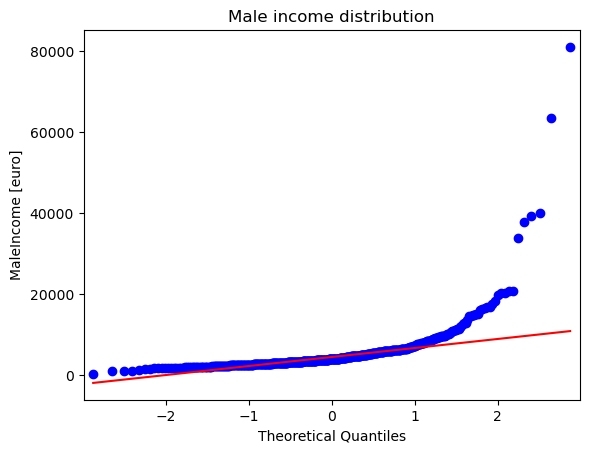

In [13]:
# plt.hist(MaleIncome)
qqplot(MaleIncome, line='q')
plt.ylabel("MaleIncome [euro]");
plt.title("Male income distribution")
print("The average income for Male is: ",MaleIncome.mean())

The average income for Male is:  4643.473214285715


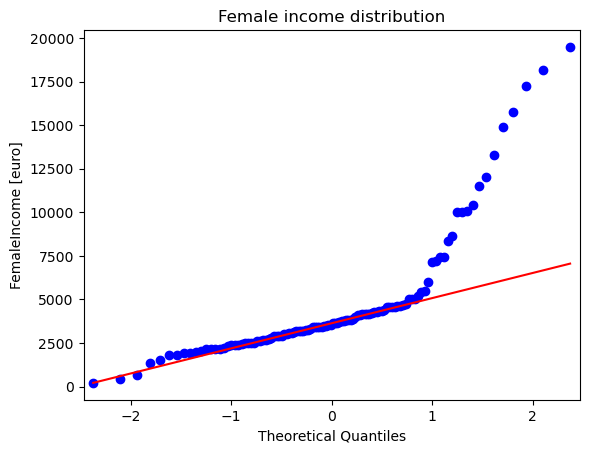

In [14]:
# plt.hist(FemaleIncome)
qqplot(FemaleIncome, line='q')
plt.ylabel("FemaleIncome [euro]")
plt.title("Female income distribution")
print("The average income for Male is: ",FemaleIncome.mean())

### Pearson Correlation

In [15]:
# fill missing values with the mean value.
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [16]:
# calculate Pearson correlation coefficient
pcc = np.corrcoef(df.ApplicantIncome, df.LoanAmount)
print(f"r={pcc}")

r=[[1.         0.56562046]
 [0.56562046 1.        ]]


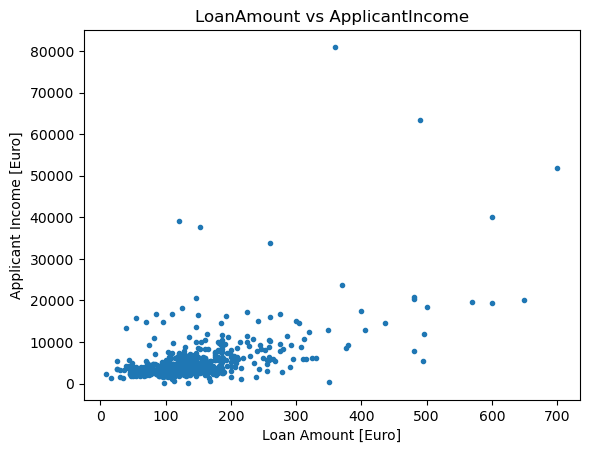

In [17]:
plt.plot(df['LoanAmount'],df['ApplicantIncome'],marker='.',linewidth=0)
plt.ylabel("Applicant Income [Euro]")
plt.xlabel("Loan Amount [Euro]")
plt.title("LoanAmount vs ApplicantIncome")
plt.show();

In [18]:
Result, r=[[1. ,0.56562046],
[0.56562046, 1. ]]
print(f"Result: {Result}")
print(f"r: {r}")

Result: [1.0, 0.56562046]
r: [0.56562046, 1.0]


### Apply on the other columns and a bit of  exploratory

In [19]:
# importing packages
import seaborn as sns

##### note there are still missing values in the dataframe 

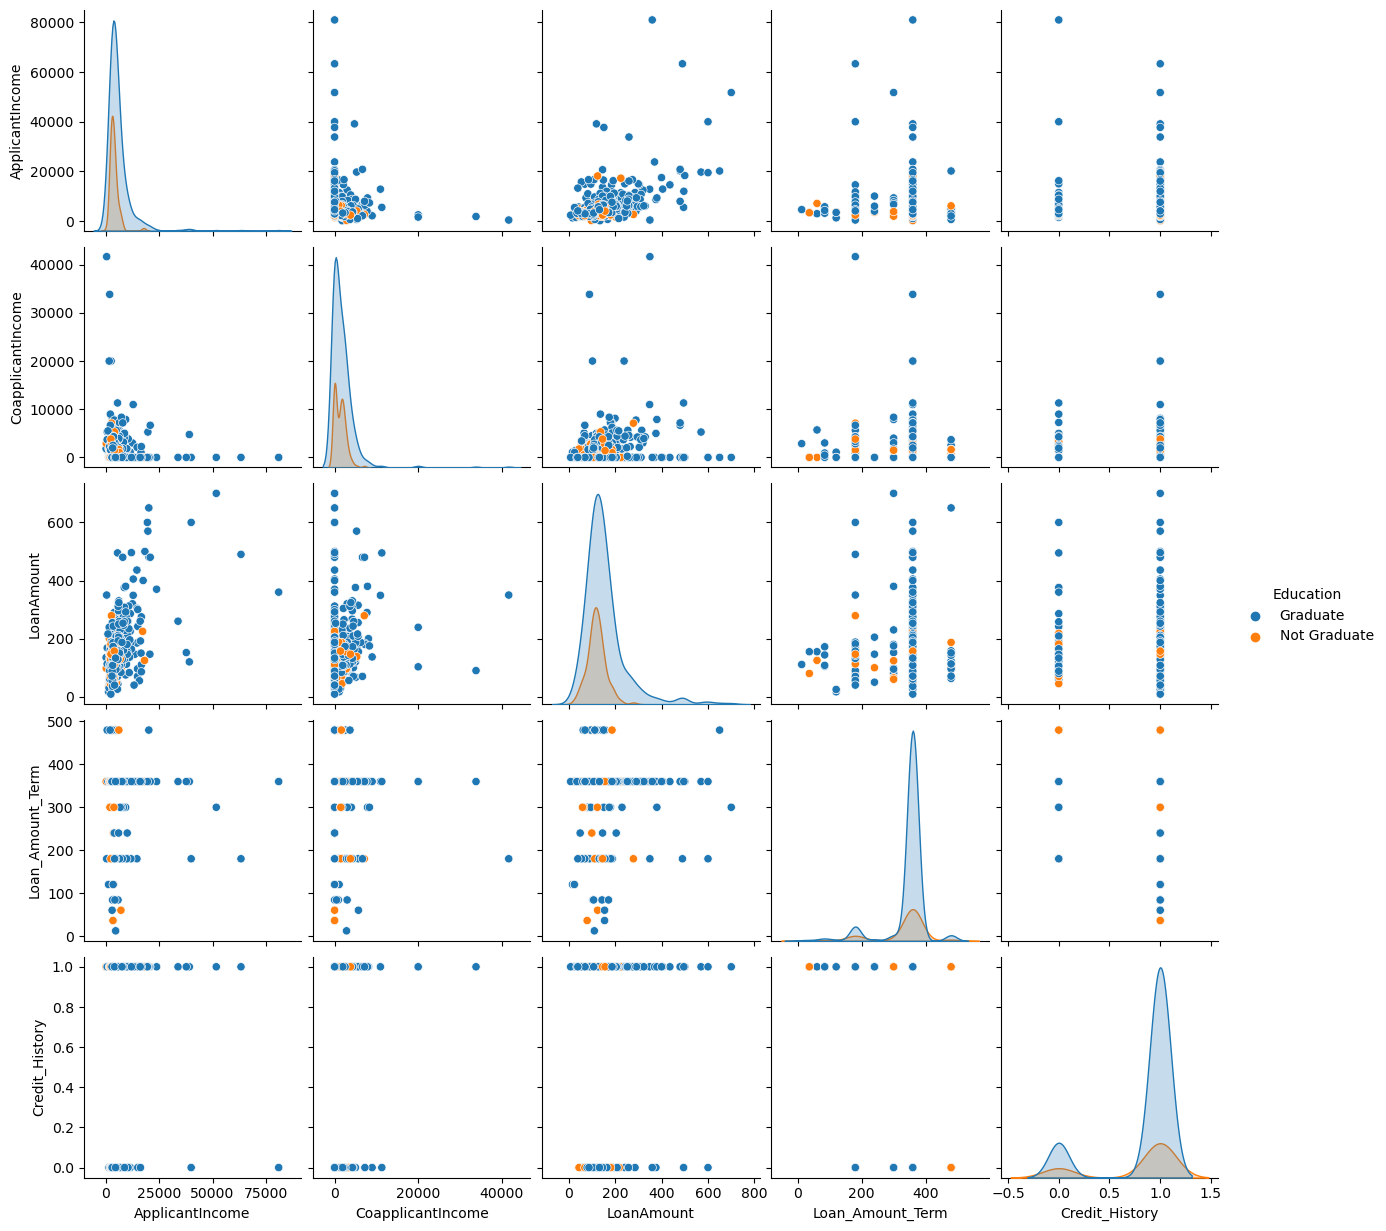

In [20]:
# show columns that are more correlated using seaborns pairplot 
sns.pairplot(df, hue ='Education')
# to show
plt.show()

In [21]:
# imputation of na values just for quick analysis
new_df = df.fillna(0)

In [22]:
# one-hot encode the variables
# encoded_df = pd.get_dummies(new_df)

In [32]:
# select numeric column only
num = new_df.select_dtypes(include=np.number)
# create the pearson correlation output as a variable
pearsonCorr = num.corr(method ='pearson')

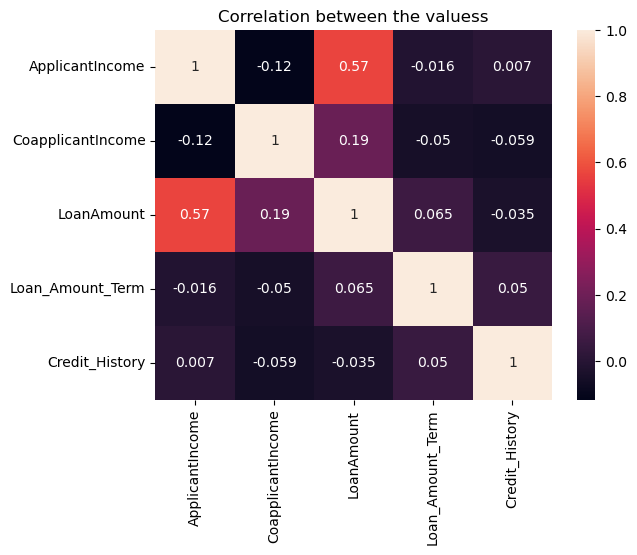

In [37]:
sns.heatmap(pearsonCorr, annot=True);
plt.title("Correlation between the valuess");

#### other columns with high correlation

In [38]:
# df fill with zeros as missing values
new_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [55]:
# check the unique the values 
new_df['Loan_Amount_Term']

11

In [45]:
plt.plot(new_df['ApplicantIncome'],new_df['Credit_History'],marker='.',linewidth=0)
plt.xlabel("ApplicantIncome [Euro]")
plt.ylabel("Credit_History binary")
plt.title("ApplicantIncome vs Credit_History")
plt.show();